# Homework 2

### necessary imports

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

### read images

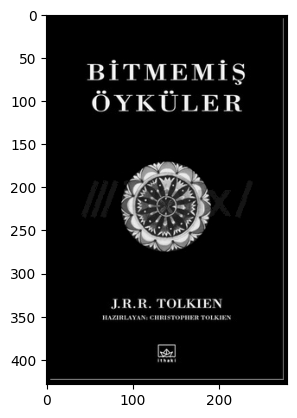

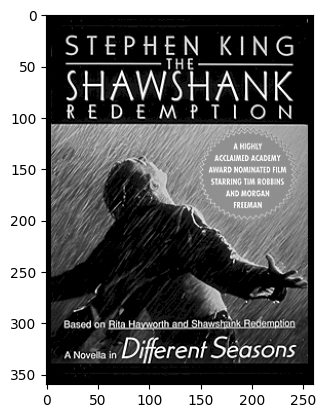

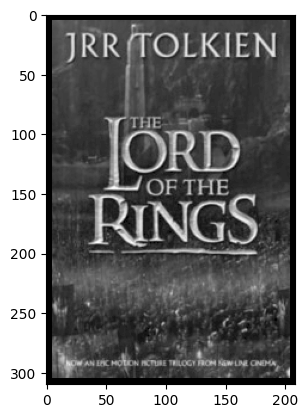

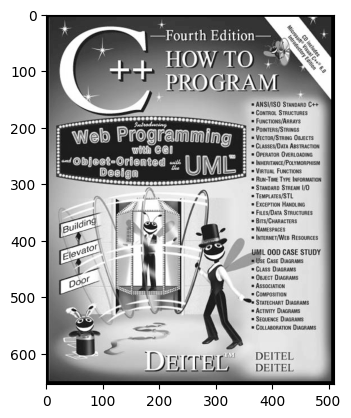

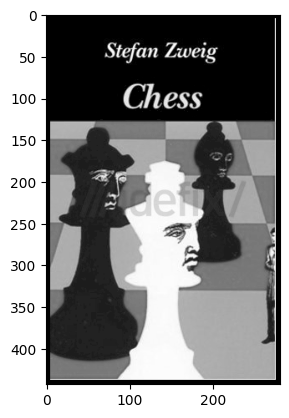

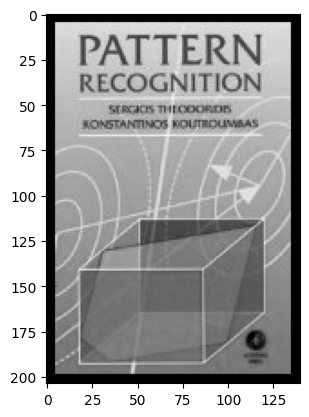

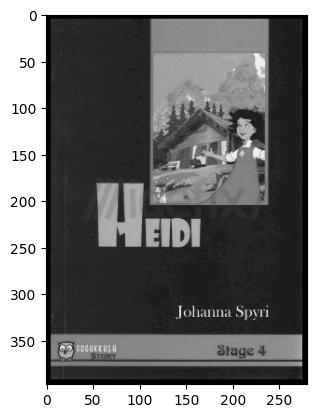

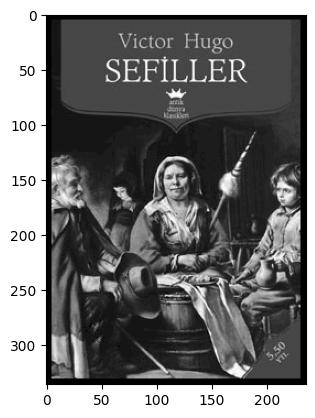

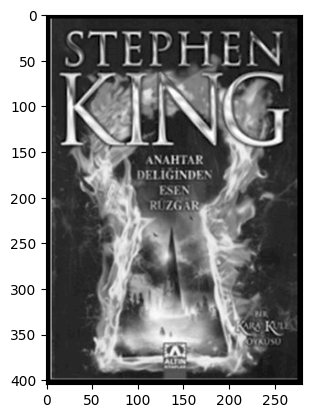

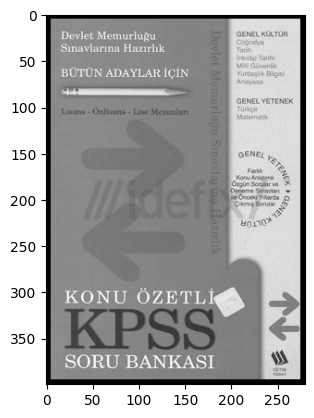

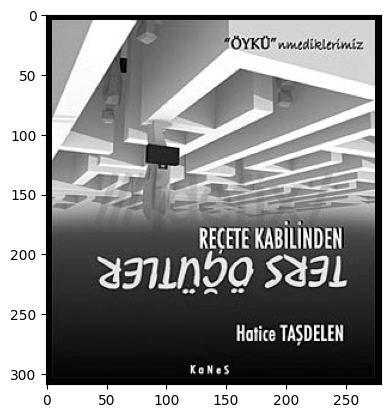

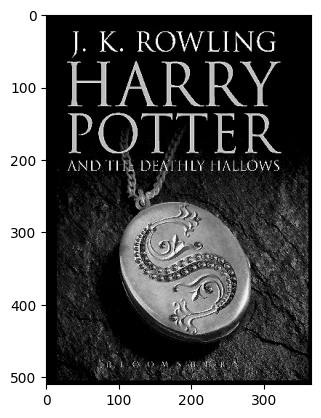

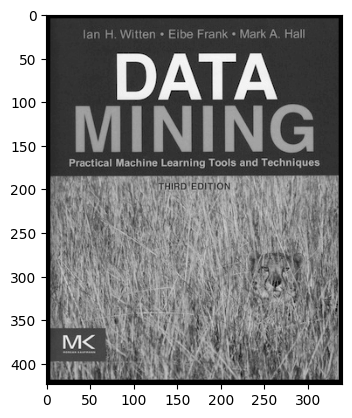

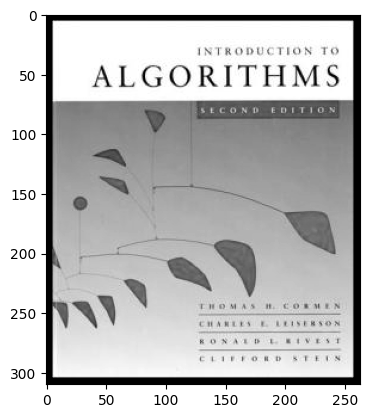

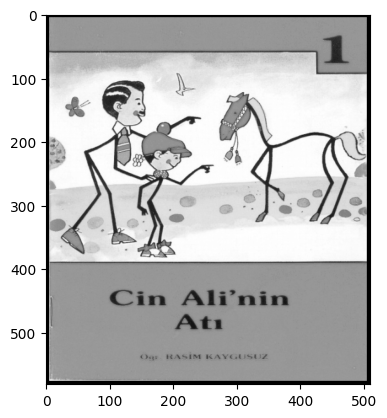

In [5]:
img_path = os.path.join(os.getcwd(), "HW2_images", 'template_images')
img_path_list = os.listdir(img_path)

# read the images as grayscale
img_list = [cv2.imread(os.path.join(img_path, img_path_list[i]), 0) for i in range(len(img_path_list))]

for img in img_list:
    plt.imshow(img, cmap='gray')
    plt.show()

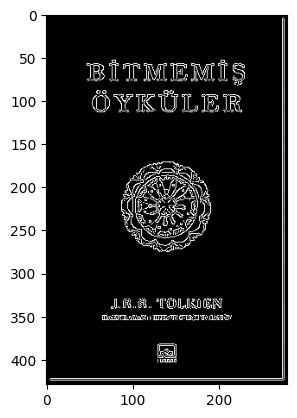

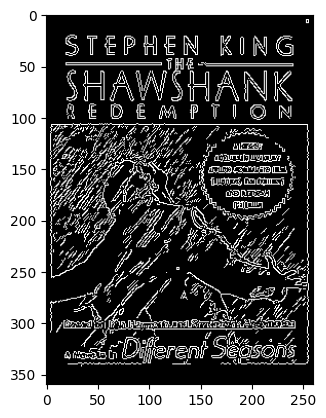

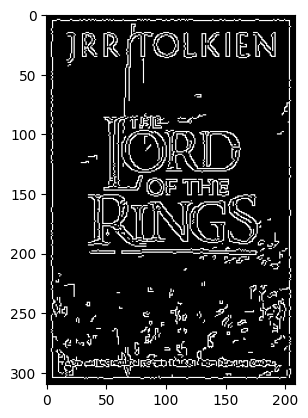

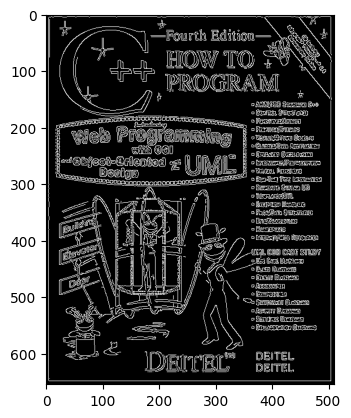

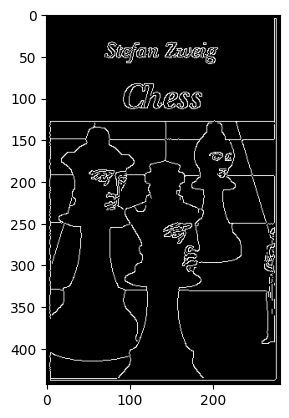

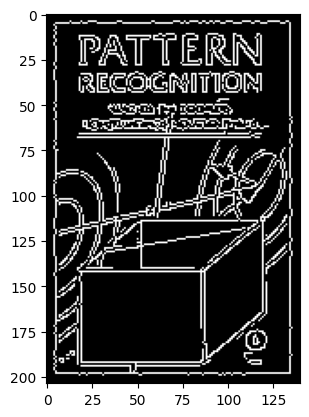

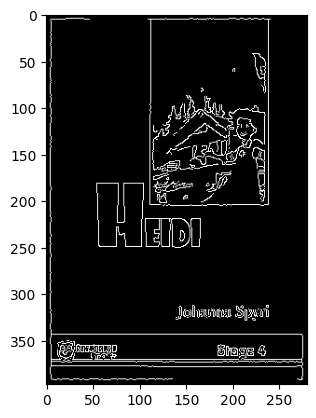

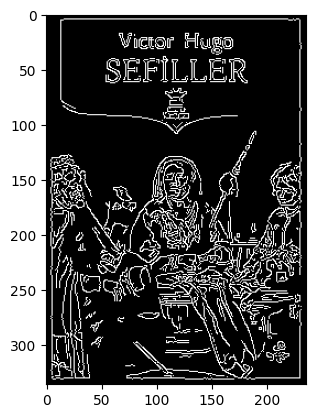

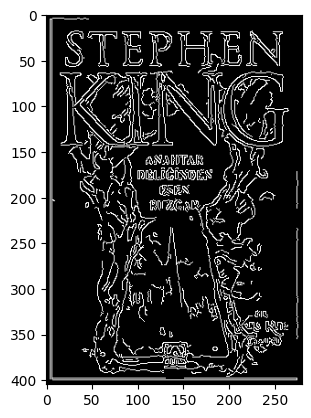

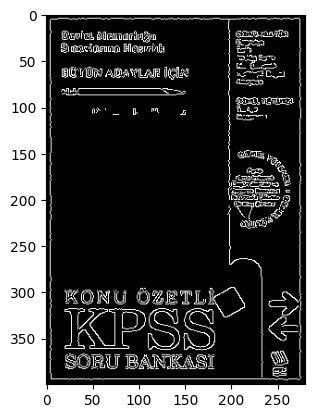

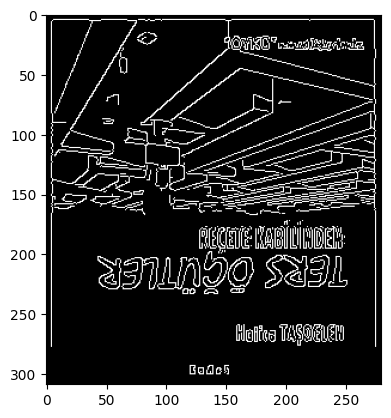

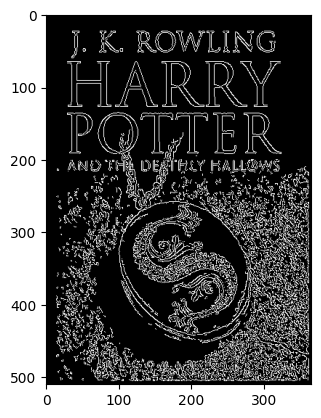

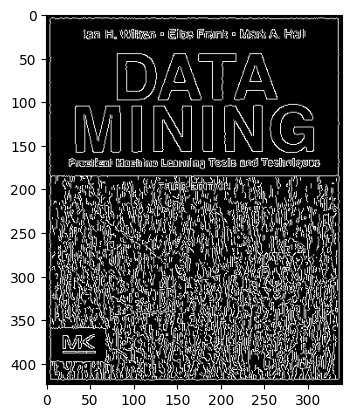

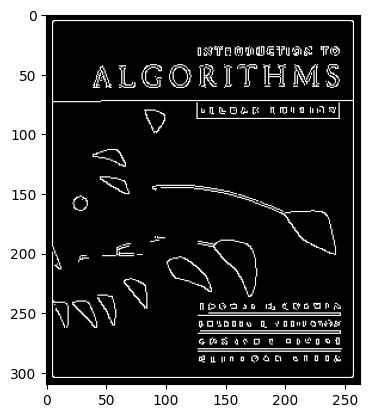

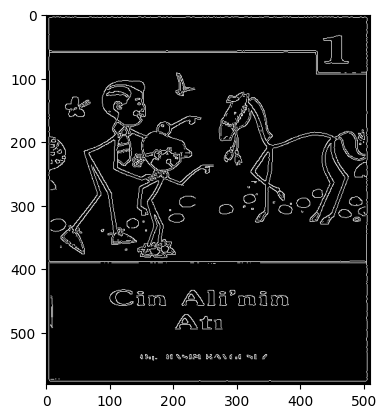

In [6]:
### perform edge detection
def getAutoEdge(image, sigma=0.23):

    v = np.median(image)

    l = int(max(0, (1.0 - sigma) * v))

    u = int(min(255, (1.0 + sigma) * v))

    return l,u

l = 0
u = 0
for i in range(len(img_list)):

    l_1,u_1 = getAutoEdge(img_list[i])
    l = max(l, l_1)
    u = max(u, u_1)

edge_list = [cv2.Canny(img_list[i], l, u) for i in range(len(img_list))]
for i in range(len(edge_list)):
    plt.imshow(edge_list[i], cmap='gray')
    plt.show()

### hough transform

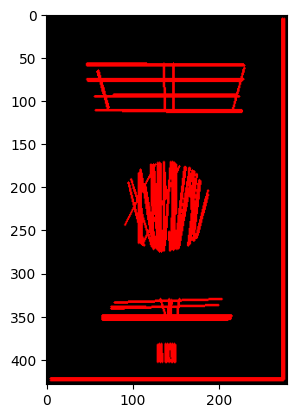

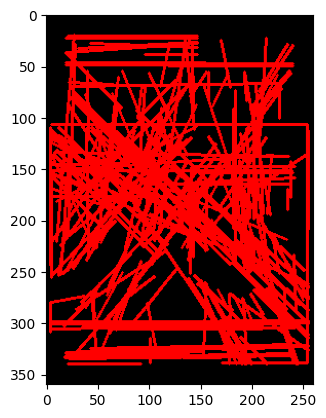

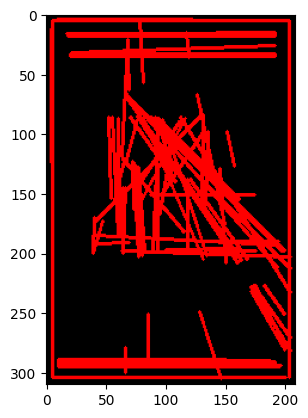

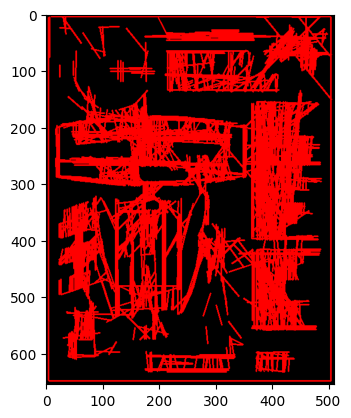

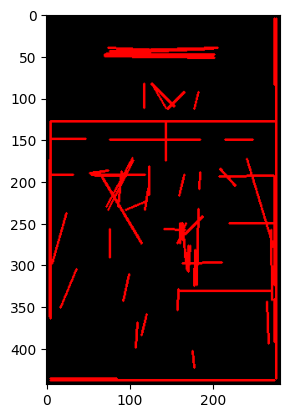

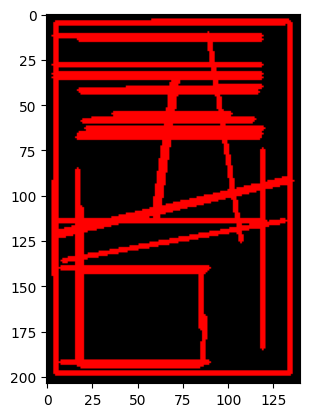

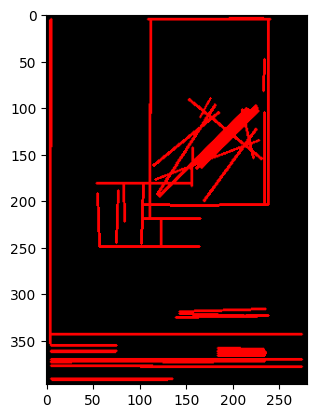

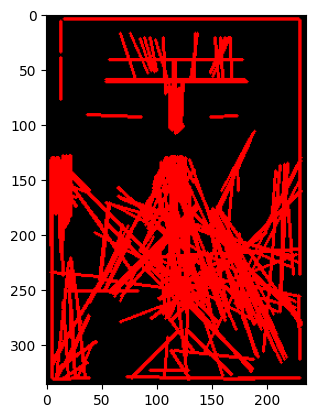

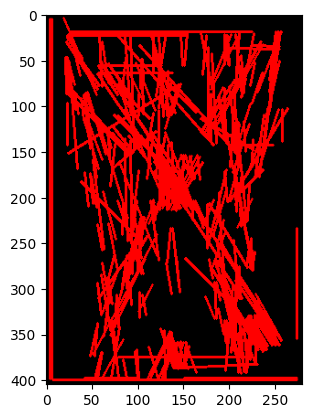

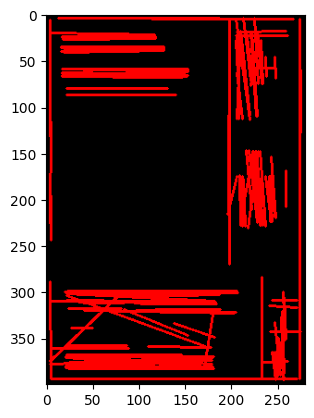

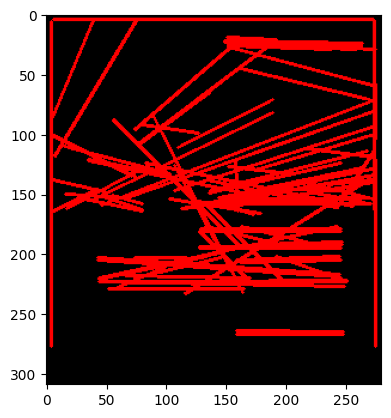

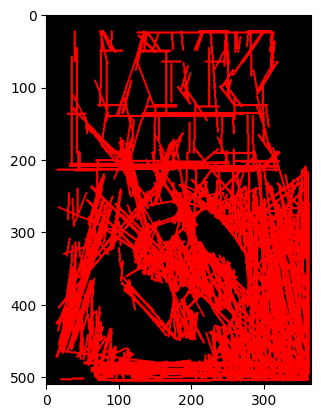

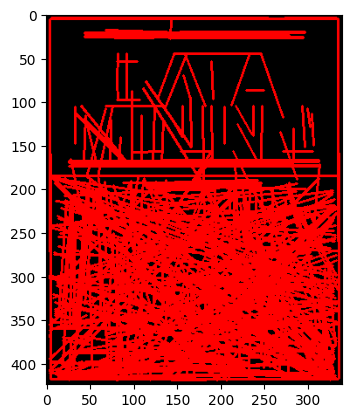

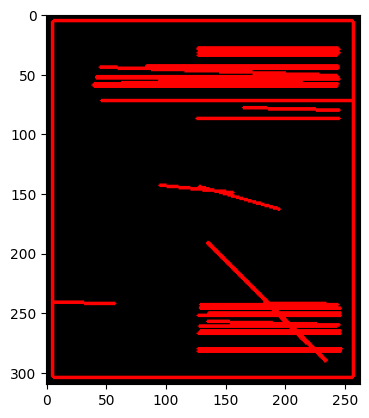

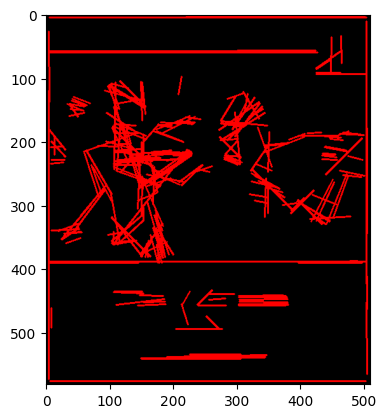

In [7]:
### perform hough transform
def hough_transform(edge, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(edge, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((edge.shape[0], edge.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    if lines is None:
        return
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

for i in range(len(edge_list)):
    line_img = hough_transform(edge_list[i], 1, np.pi/180, 40, 20, 15)
    plt.imshow(line_img)
    plt.show()
